<a href="https://colab.research.google.com/github/S-Priyanshu/Iris-dataset/blob/main/Iris_logistic_regression_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Imported libraries for data analysis and visualization in Python

In [ ]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Iris dataset is loaded into a Pandas DataFrame

In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

This function is used to count the occurrences of unique values in a categorical variable. This output shows that there are 50 instances of each species in the Iris dataset.

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

This method in Pandas is used to check for missing or null values in a DataFrame.The output will show the count of null values for each column in your DataFrame. If there are no null values, the count for each column will be zero. The output here shows that that there are no missing values in any of the columns of your DataFrame (df). All columns have a count of zero null values.

<Axes: xlabel='petal_length', ylabel='sepal_width'>

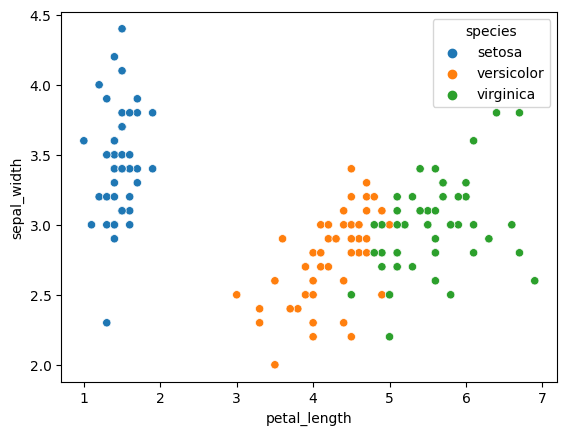

In [ ]:
sns.scatterplot(data=df,x='petal_length',y='sepal_width',hue='species')

A scatter plot is ploted to know about the data.
For SETOSA sepal width is greater than petal length and
For Virginica petal length is more than sepalwidth

# **LOGISTIC REGRESSION**

In [ ]:
flower_mapping = {'setosa':0,'versicolor':1,'virginica':2}
df["species"]=df["species"].map(flower_mapping)

Since machine learning does not understand the terms/words like setosa , virginica , versicolor  we need to convert them into numbers or classes.
So here the mapping is done ,ie; mapped three species into three classes

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Head file is called after mapping

**Preparing inputs and outputs**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']].values
y=df[['species']].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
X_train.shape


(112, 4)

In [ ]:
Y_train.shape

(112, 1)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
Y_test.shape

(38, 1)

Here 'x' is the input that is sepal_length,sepal_width,petal_length,petal_width are the inputs independent variables ans y that is species is the dependend variable . species depends on different feature of the flower. divide the dataset into train and test

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()   # Assuming x is your feature matrix and y is your target variable
model.fit(X_train,Y_train)    # Fit the logistic regression model to the data

LogisticRegression()

A logistic regression model is created with the help of logistic regresssion algorithm


*   Imports the LogisticRegression class from scikit-learn.
*    Initializes a logistic regression mode
*    Fits the logistic regression model to your data. x should be your feature matrix (containing the independent variables), and y should be your target variable (containing the labels or classes).Fit is done on the train data



prediction is made

In [ ]:
model.score(X_train,Y_train)

0.9732142857142857

By executing logistic algorithm and predicting the accuracy of various independent variables for the depended variable . we have got an accuracy of 97%





**Make Prediction**

In [ ]:
# expected = Y_test
# predicted =model.predict(X_test)
# predicted

In [ ]:

y_pred=model.predict(X_test)


In [ ]:
y_pred

array([2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[ 9,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 13]])

In [ ]:
accuracy=accuracy_score(Y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 94.74


We can see that accuracy of the model is 94.74 percent which is  accurate.

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



Performance matrices or aquired ,from this we can see precision accuracy recall and f1-score of setosa=0,versicolor=1,virginica=2

Text(33.22222222222222, 0.5, 'actual values')

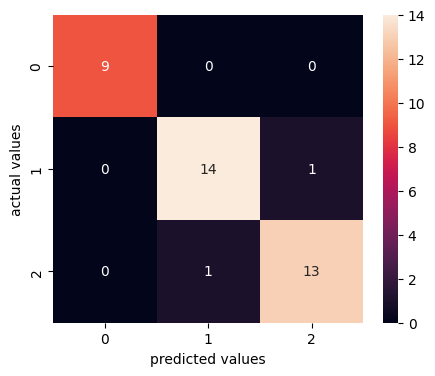

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted values')
plt.ylabel('actual values')

On test dataset , from heap map we undestand that the confusion metrix is much more effective.

**on test data**


*   from these heap map we can say that ,we have correct predicted for the9 independendent variable of class 0 ,ie; for setosa
* for class 1 ,ie; versicolor we have 14 correct prediction and one wrong prediction
*  for class 2 ,ie; virginica we have 13 correct prediction and one wrong prediction

